In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


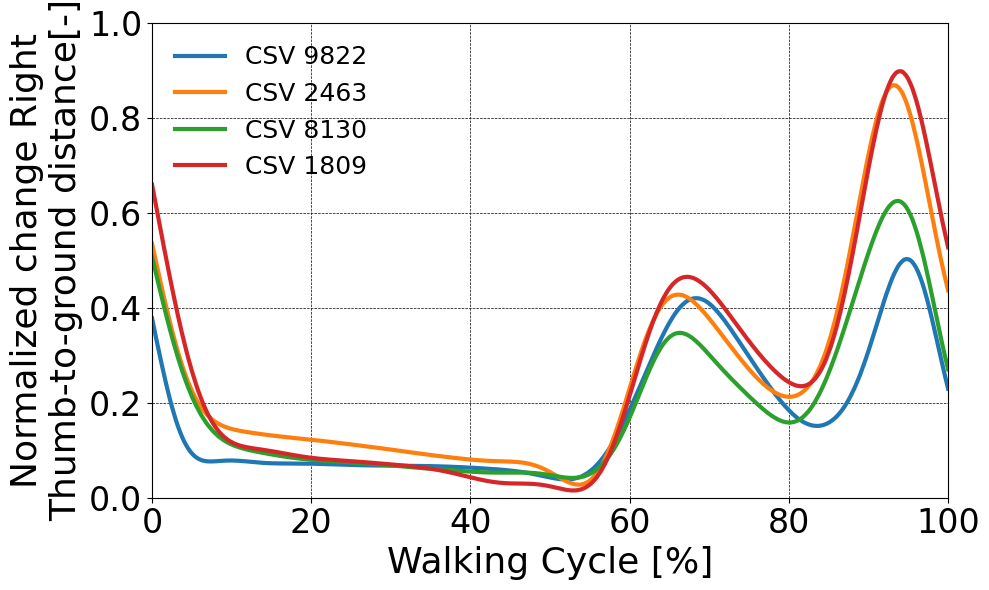

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 5694 : 最もつまずきやすい
# 10062 : 中程度つまずきやすい
# 2447 : 最もつまずきにくい
# 2113 : 中程度つまずきやすい


# csv_numbers_1 = [6432, 1174]# 5558]  # Add more numbers 10062,if needed
# csv_numbers_2 = [2469, 6201]

csv_numbers_1 = [9822, 8130]# 5558]  # Add more numbers 10062,if needed
csv_numbers_2 = [2463, 1809]#1809, 2034]
plt.figure(figsize=(10, 6))

# Assuming the column labels are in a variable named column_labels_3
i = 20  # 21st column

for csv_number_1, csv_number_2 in zip(csv_numbers_1, csv_numbers_2):
    # Load the CSV files
    csv_path_1 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_1/SotukenA_data_{csv_number_1}.csv"
    csv_path_2 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_2/SotukenA_data_{csv_number_2}.csv"
    
    df_1 = pd.read_csv(csv_path_1, encoding='latin-1')
    df_2 = pd.read_csv(csv_path_2, encoding='latin-1')

    # Extract the data from the specified column
    data_column_1 = df_1.iloc[:, i]
    data_column_2 = df_2.iloc[:, i]

    # Set the x-axis values as a percentage of the walking cycle
    cycle_percentage = np.linspace(0, 100, len(data_column_1))

    # Plot the data
    plt.plot(cycle_percentage, data_column_1, label=f'CSV {csv_number_1}', linewidth=3)
    plt.plot(cycle_percentage, data_column_2, label=f'CSV {csv_number_2}', linewidth=3)

# Set plot properties
plt.xlabel('Walking Cycle [%]', fontsize=26)
plt.ylabel('Normalized change Right\nThumb-to-ground distance[-]', 
           fontsize=26)
plt.xticks(np.linspace(0,100,6))     
plt.yticks(np.linspace(0,1,6)) 
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=24)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xlim(0.0, 100)
plt.ylim(0.0, 1)
plt.tight_layout()

# Add legend
plt.legend(fontsize=18, frameon=False)

# Show the plot
plt.show()


# softmax_test_redults.csvの拇指床間距離極大値を計算

#### 正しく分類できたもののみをcsvに残す 
#### (softmax関数の出力＆拇指床間距離の高さでつまずきやすさを判断)

In [45]:
import os
import pandas as pd

# 入力となるCSVファイルのパス
input_csv_path = "/app/Oba_卒業研究A/for_emotional_engineering/softmax_test_results.csv"

# CSV名と極大値の列番号
name_column = 0
max_value_column = 5

# 読み込み
df_input = pd.read_csv(input_csv_path, skiprows=1, header=None)

# 必要な列が存在しない場合、足りない列を追加
if df_input.shape[1] <= max_value_column:
    # 列が足りない場合、追加の列を作成
    df_input = pd.concat([df_input, pd.DataFrame(columns=[i for i in range(df_input.shape[1], max_value_column + 1)])], axis=1)

# 検索対象のディレクトリ
search_directory_1 = "/app/hinann/sotukenB_clustering/sotukenB_thumb_1"
search_directory_2 = "/app/hinann/sotukenB_clustering/sotukenB_thumb_2"

for index, row in df_input.iterrows():
    # 1列目のCSV名を取得
    csv_name = row[name_column]

    # CSV名と一致するファイルを検索
    matching_files_1 = [file for file in os.listdir(search_directory_1) if file == csv_name]
    matching_files_2 = [file for file in os.listdir(search_directory_2) if file == csv_name]

    if len(matching_files_1) > 0:
        matching_file_path = os.path.join(search_directory_1, matching_files_1[0])
    elif len(matching_files_2) > 0:
        matching_file_path = os.path.join(search_directory_2, matching_files_2[0])
    else:
        print(f"{csv_name} に対応するCSVファイルが見つかりませんでした。")
        continue

    # CSVファイルを読み込み
    df_matching = pd.read_csv(matching_file_path, encoding='latin-1')

    # 20列目の極大値を取得
    max_value = df_matching.iloc[:, 20].max()

    # 結果を元のCSVファイルに保存
    df_input.at[index, max_value_column] = max_value

    print(f"{csv_name} の極大値: {max_value}")

# 2列目と4列目が一致する行を残し、一致しない行を削除
df_input = df_input[df_input.iloc[:, 1] == df_input.iloc[:, 3]]

# 結果をCSVに保存
df_input.to_csv(input_csv_path, index=False)


SotukenA_data_1527.csv の極大値: 0.6836623774918051
SotukenA_data_5972.csv の極大値: 0.6474887368886155
SotukenA_data_5991.csv の極大値: 0.4877080736044208
SotukenA_data_175.csv の極大値: 0.7578753035667125
SotukenA_data_8846.csv の極大値: 0.6371956149995335
SotukenA_data_4865.csv の極大値: 0.6725464916518037
SotukenA_data_2596.csv の極大値: 0.7414499385357309
SotukenA_data_2220.csv の極大値: 0.7916180834534355
SotukenA_data_6784.csv の極大値: 0.5430144515587242
SotukenA_data_886.csv の極大値: 0.7037717763527661
SotukenA_data_5976.csv の極大値: 0.5391694077119381
SotukenA_data_2773.csv の極大値: 0.7097263078412216
SotukenA_data_1910.csv の極大値: 0.8625317494819905
SotukenA_data_2731.csv の極大値: 0.9388341716520964
SotukenA_data_10444.csv の極大値: 0.6295533207349772
SotukenA_data_1765.csv の極大値: 0.6545402532126304
SotukenA_data_5105.csv の極大値: 0.6949452782772804
SotukenA_data_4001.csv の極大値: 0.8287212032626795
SotukenA_data_10406.csv の極大値: 0.7584181269301374
SotukenA_data_2214.csv の極大値: 0.5396219939639263
SotukenA_data_2237.csv の極大値: 0.738319986

In [31]:
import os
import pandas as pd

# 入力となるCSVファイルのパス
input_csv_path = "/app/Oba_卒業研究A/for_emotional_engineering/softmax_test_results.csv"

# CSV名と極大値の列番号
name_column = 0
max_value_column = 5

# 読み込み
df_input = pd.read_csv(input_csv_path, skiprows=1, header=None)

# 必要な列が存在しない場合、足りない列を追加
if df_input.shape[1] <= max_value_column:
    # 列が足りない場合、追加の列を作成
    df_input = pd.concat([df_input, pd.DataFrame(columns=[i for i in range(df_input.shape[1], max_value_column + 1)])], axis=1)

# 検索対象のディレクトリ
search_directory = "/app/hinann/sotukenB_clustering/sotukenB_thumb_1"

for index, row in df_input.iterrows():
    # 1列目のCSV名を取得
    csv_name = row[name_column]

    # CSV名と一致するファイルを検索
    matching_files = [file for file in os.listdir(search_directory) if file == csv_name]

    if len(matching_files) > 0:
        matching_file_path = os.path.join(search_directory, matching_files[0])

        # CSVファイルを読み込み
        df_matching = pd.read_csv(matching_file_path, encoding='latin-1')

        # 20列目の極大値を取得
        max_value = df_matching.iloc[:, 20].max()

        # 結果を元のCSVファイルに保存
        df_input.at[index, max_value_column] = max_value

        print(f"{csv_name} の極大値: {max_value}")
    else:
        print(f"{csv_name} に対応するCSVファイルが見つかりませんでした。")

# 結果をCSVに保存
df_input.to_csv(input_csv_path, index=False)
# 2列目と4列目が一致する行を残し、一致しない行を削除
df_input = df_input[df_input.iloc[:, 1] == df_input.iloc[:, 3]]

# 結果をCSVに保存
df_input.to_csv(input_csv_path, index=False)



SotukenA_data_5972.csv の極大値: 0.6474887368886155
SotukenA_data_1527.csv の極大値: 0.6836623774918051
SotukenA_data_175.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_8846.csv の極大値: 0.6371956149995335
SotukenA_data_5991.csv の極大値: 0.4877080736044208
SotukenA_data_2773.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_4865.csv の極大値: 0.6725464916518037
SotukenA_data_2220.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_6784.csv の極大値: 0.5430144515587242
SotukenA_data_5976.csv の極大値: 0.5391694077119381
SotukenA_data_2596.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_886.csv の極大値: 0.7037717763527661
SotukenA_data_2731.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_1910.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_1765.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_5105.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_4001.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_10444.csv の極大値: 0.6295533207349772
SotukenA_data_10406.csv の極大値: 0.7584181269301374
SotukenA_data_2237.csv に対応するCSVファイルが見つかりませんでした。
SotukenA_data_2214.csv の極大値: 0.539621993

### つまずきやすい歩容のみ可視化

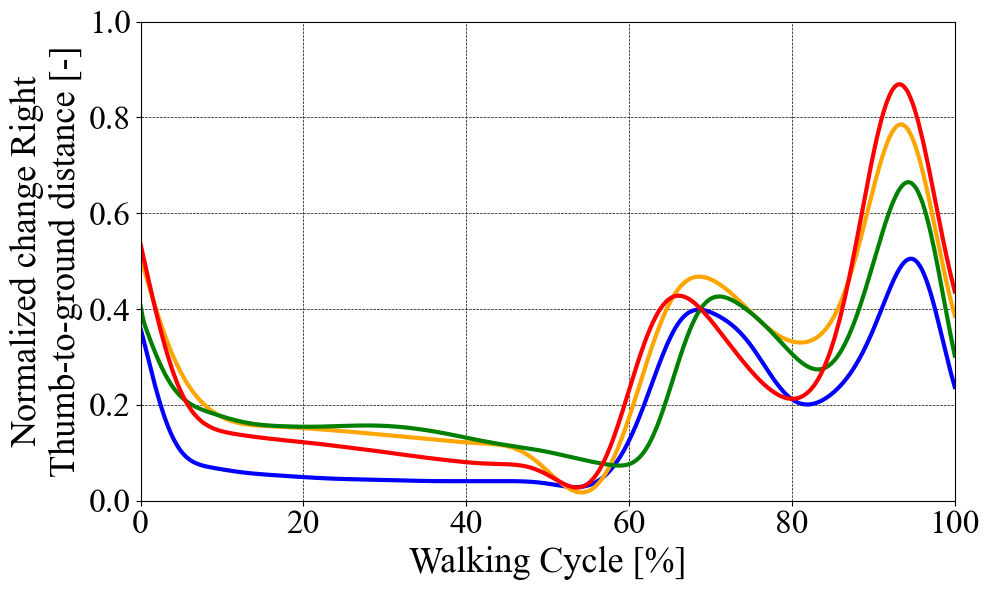

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Times New Romanフォントを使用するための設定
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
# 5694 : 最もつまずきやすい
# 10062 : 中程度つまずきやすい
# 2447 : 最もつまずきにくい
# 2113 : 中程度つまずきやすい

# csv_numbers_1 = [6432, 1174]# 5558]  # Add more numbers 10062,if needed
# csv_numbers_2 = [2469, 6201]
# 10193
csv_numbers_1 = [6656, 939]# 5558]  # Add more numbers 10062,if needed
csv_numbers_2 = [1693, 2463]#1809, 2034]
plt.figure(figsize=(10, 6))

# Assuming the column labels are in a variable named column_labels_3
i = 20  # 21st column

# Color mapping for csv_numbers_1
color_map_1 = {6656: 'blue', 939: 'green'}

# Color mapping for csv_numbers_2
color_map_2 = {2463: 'red', 1693: 'orange'}

for csv_number_1, csv_number_2 in zip(csv_numbers_1, csv_numbers_2):
    # Load the CSV files
    csv_path_1 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_1/SotukenA_data_{csv_number_1}.csv"
    csv_path_2 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_2/SotukenA_data_{csv_number_2}.csv"
    
    df_1 = pd.read_csv(csv_path_1, encoding='latin-1')
    df_2 = pd.read_csv(csv_path_2, encoding='latin-1')

    # Extract the data from the specified column
    data_column_1 = df_1.iloc[:, i]
    data_column_2 = df_2.iloc[:, i]

    # Set the x-axis values as a percentage of the walking cycle
    cycle_percentage = np.linspace(0, 100, len(data_column_1))

    # Plot the data with specified colors
    plt.plot(cycle_percentage, data_column_1, label=f'data_{csv_number_1}', linewidth=3, color=color_map_1.get(csv_number_1, 'blue'))
    plt.plot(cycle_percentage, data_column_2, label=f'data_{csv_number_2}', linewidth=3, color=color_map_2.get(csv_number_2, 'red'))

# Set plot properties
plt.xlabel('Walking Cycle [%]', fontsize=26, fontname = 'Times New Roman')
plt.ylabel('Normalized change Right\nThumb-to-ground distance [-]', fontsize=26,fontname = 'Times New Roman')
plt.xticks(np.linspace(0, 100, 6))
plt.yticks(np.linspace(0, 1, 6))
plt.grid(True, color='black', linestyle='--', linewidth=0.5)#,fontname = 'Times New Roman')
plt.tick_params(labelsize=24)#,fontname = 'Times New Roman')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xlim(0.0, 100)
plt.ylim(0.0, 1)
plt.tight_layout()

# Add legend
#plt.legend(fontsize=18, frameon=False)

# Show the plot
plt.show()


#5991　ほりゅう


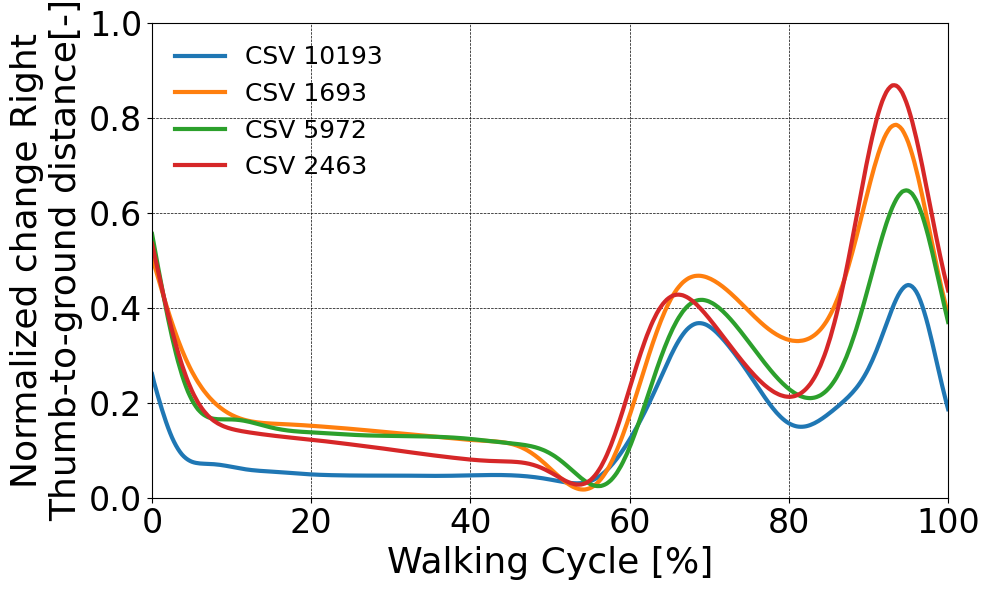

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 5694 : 最もつまずきやすい
# 10062 : 中程度つまずきやすい
# 2447 : 最もつまずきにくい
# 2113 : 中程度つまずきやすい


# csv_numbers_1 = [6432, 1174]# 5558]  # Add more numbers 10062,if needed
# csv_numbers_2 = [2469, 6201]
# 10193
csv_numbers_1 = [10193, 5972]# 5558]  # Add more numbers 10062,if needed
csv_numbers_2 = [1693, 2463]#1809, 2034]
plt.figure(figsize=(10, 6))

# Assuming the column labels are in a variable named column_labels_3
i = 20  # 21st column

for csv_number_1, csv_number_2 in zip(csv_numbers_1, csv_numbers_2):
    # Load the CSV files
    csv_path_1 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_1/SotukenA_data_{csv_number_1}.csv"
    csv_path_2 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_2/SotukenA_data_{csv_number_2}.csv"
    
    df_1 = pd.read_csv(csv_path_1, encoding='latin-1')
    df_2 = pd.read_csv(csv_path_2, encoding='latin-1')

    # Extract the data from the specified column
    data_column_1 = df_1.iloc[:, i]
    data_column_2 = df_2.iloc[:, i]

    # Set the x-axis values as a percentage of the walking cycle
    cycle_percentage = np.linspace(0, 100, len(data_column_1))

    # Plot the data
    plt.plot(cycle_percentage, data_column_1, label=f'CSV {csv_number_1}', linewidth=3)
    plt.plot(cycle_percentage, data_column_2, label=f'CSV {csv_number_2}', linewidth=3)

# Set plot properties
plt.xlabel('Walking Cycle [%]', fontsize=26)
plt.ylabel('Normalized change Right\nThumb-to-ground distance[-]', 
           fontsize=26)
plt.xticks(np.linspace(0,100,6))     
plt.yticks(np.linspace(0,1,6)) 
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=24)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xlim(0.0, 100)
plt.ylim(0.0, 1)
plt.tight_layout()

# Add legend
plt.legend(fontsize=18, frameon=False)

# Show the plot
plt.show()

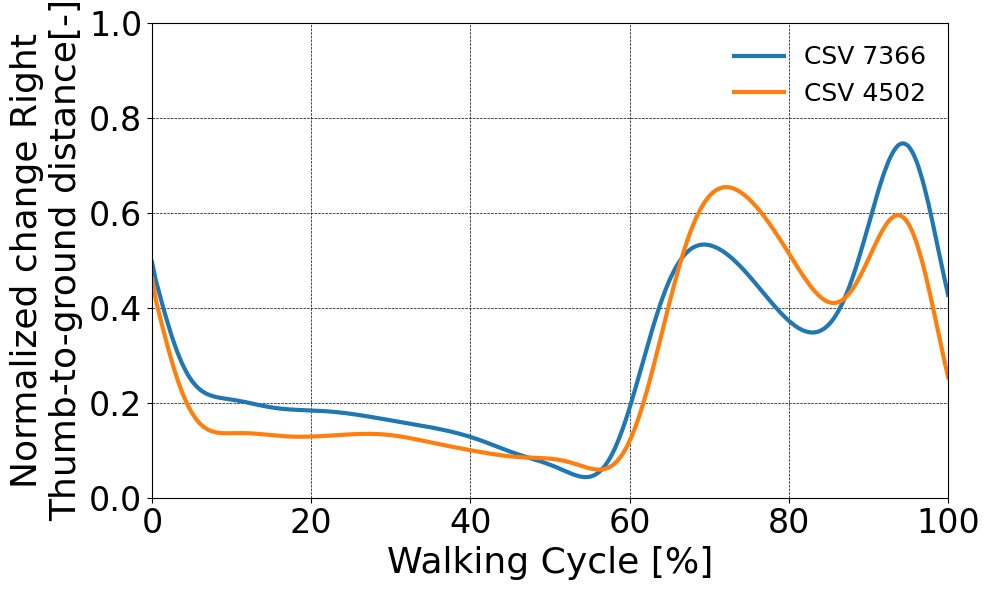

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 5694 : 最もつまずきやすい
# 10062 : 中程度つまずきやすい
# 2447 : 最もつまずきにくい
# 2113 : 中程度つまずきやすい

# csv_numbers_1 = [6432, 1174]# 5558]  # Add more numbers 10062,if needed
# csv_numbers_2 = [2469, 6201]

# softmax関数の出力のうち、つまずきやすい0.90以上でつま先高さが最も低い
# softmax関数の出力のうち、つまずきやすい0.70以下でつま先高さが最も高い
csv_numbers_1 = [10345, 5972]# 5558]  # Add more numbers 10062,if needed

plt.figure(figsize=(10, 6))

# Assuming the column labels are in a variable named column_labels_3
i = 20  # 21st column

for csv_number_1 in csv_numbers_1:
    # Load the CSV file
    csv_path_1 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_1/SotukenA_data_{csv_number_1}.csv"
    
    df_1 = pd.read_csv(csv_path_1, encoding='latin-1')

    # Extract the data from the specified column
    data_column_1 = df_1.iloc[:, i]

    # Set the x-axis values as a percentage of the walking cycle
    cycle_percentage = np.linspace(0, 100, len(data_column_1))

    # Plot the data
    plt.plot(cycle_percentage, data_column_1, label=f'CSV {csv_number_1}', linewidth=3)

# Set plot properties
plt.xlabel('Walking Cycle [%]', fontsize=26)
plt.ylabel('Normalized change Right\nThumb-to-ground distance[-]', fontsize=26)
plt.xticks(np.linspace(0, 100, 6))
plt.yticks(np.linspace(0, 1, 6))
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=24)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xlim(0.0, 100)
plt.ylim(0.0, 1)
plt.tight_layout()

# Add legend
plt.legend(fontsize=18, frameon=False)

# Show the plot
plt.show()


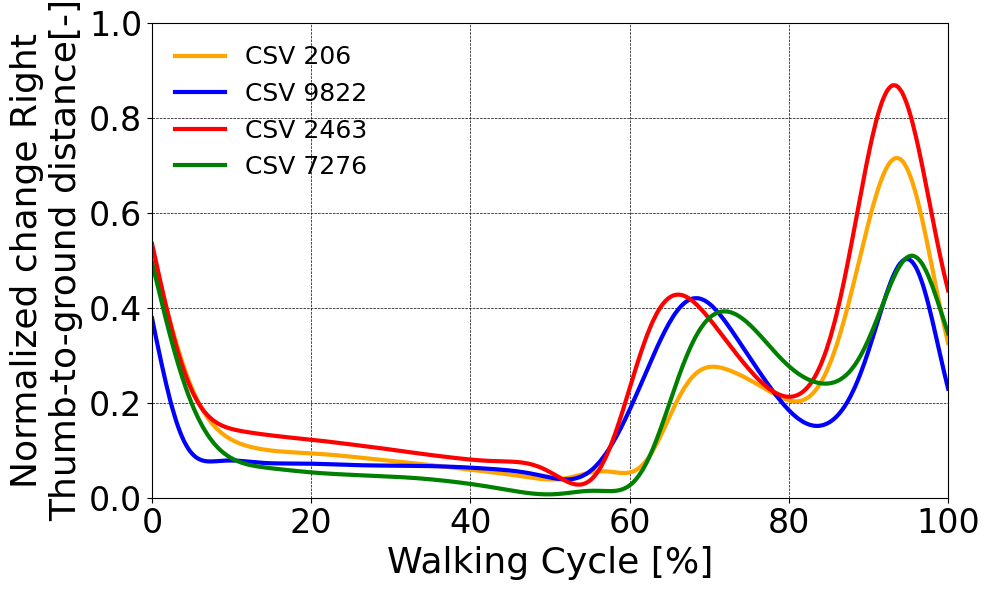

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 5694 : 最もつまずきやすい
# 10062 : 中程度つまずきやすい
# 2447 : 最もつまずきにくい
# 2113 : 中程度つまずきやすい

# csv_numbers_1 = [6432, 1174]# 5558]  # Add more numbers 10062, if needed
# csv_numbers_2 = [2469, 6201]
# 10193
csv_numbers_1 =[9822, 7276]# 5558]  # Add more numbers 10062, if needed
csv_numbers_2 = [206, 2463]# 1809, 2034]
plt.figure(figsize=(10, 6))

# Assuming the column labels are in a variable named column_labels_3
i = 20  # 21st column

# Color mapping for csv_numbers_1
color_map_1 = {9822: 'blue', 7276: 'green'}
# 10193
# Color mapping for csv_numbers_2
color_map_2 = {206: 'orange', 2463: 'red'}

# Plot in the desired order with zorder
for z, (csv_number_1, csv_number_2) in enumerate(zip(csv_numbers_1, csv_numbers_2)):
    # Load the CSV files
    csv_path_1 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_1/SotukenA_data_{csv_number_1}.csv"
    csv_path_2 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_2/SotukenA_data_{csv_number_2}.csv"
    
    df_1 = pd.read_csv(csv_path_1, encoding='latin-1')
    df_2 = pd.read_csv(csv_path_2, encoding='latin-1')

    # Extract the data from the specified column
    data_column_1 = df_1.iloc[:, i]
    data_column_2 = df_2.iloc[:, i]

    # Set the x-axis values as a percentage of the walking cycle
    cycle_percentage = np.linspace(0, 100, len(data_column_1))
    plt.plot(cycle_percentage, data_column_2, label=f'CSV {csv_number_2}', linewidth=3, color=color_map_2.get(csv_number_2, 'red'))#, zorder=1)

    # Plot the data with specified colors and zorder
    plt.plot(cycle_percentage, data_column_1, label=f'CSV {csv_number_1}', linewidth=3, color=color_map_1.get(csv_number_1, 'blue'))#, zorder=2)
    
# Set plot properties
plt.xlabel('Walking Cycle [%]', fontsize=26)
plt.ylabel('Normalized change Right\nThumb-to-ground distance[-]', fontsize=26)
plt.xticks(np.linspace(0, 100, 6))
plt.yticks(np.linspace(0, 1, 6))
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=24)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xlim(0.0, 100)
plt.ylim(0.0, 1)
plt.tight_layout()

# Add legend
plt.legend(fontsize=18, frameon=False)

# Show the plot
plt.show()



# 今日の


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 5694 : 最もつまずきやすい
# 10062 : 中程度つまずきやすい
# 2447 : 最もつまずきにくい
# 2113 : 中程度つまずきやすい

# csv_numbers_1 = [6432, 1174]# 5558]  # Add more numbers 10062, if needed
# csv_numbers_2 = [2469, 6201]
# 10193
csv_numbers_1 =[6656, 939]# 5558]  # Add more numbers 10062, if needed
csv_numbers_2 = [206, 2463]# 1809, 2034]
plt.figure(figsize=(10, 6))

# Assuming the column labels are in a variable named column_labels_3
i = 20  # 21st column

# Color mapping for csv_numbers_1
color_map_1 = {6656: 'blue', 939: 'green'}
# 10193
# Color mapping for csv_numbers_2
color_map_2 = {206: 'orange', 2463: 'red'}

# Plot in the desired order with zorder
for z, (csv_number_1, csv_number_2) in enumerate(zip(csv_numbers_1, csv_numbers_2)):
    # Load the CSV files
    csv_path_1 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_1/SotukenA_data_{csv_number_1}.csv"
    csv_path_2 = f"/app/hinann/sotukenB_clustering/sotukenB_thumb_2/SotukenA_data_{csv_number_2}.csv"
    
    df_1 = pd.read_csv(csv_path_1, encoding='latin-1')
    df_2 = pd.read_csv(csv_path_2, encoding='latin-1')

    # Extract the data from the specified column
    data_column_1 = df_1.iloc[:, i]
    data_column_2 = df_2.iloc[:, i]

    # Set the x-axis values as a percentage of the walking cycle
    cycle_percentage = np.linspace(0, 100, len(data_column_1))
    plt.plot(cycle_percentage, data_column_2, label=f'CSV {csv_number_2}', linewidth=3, color=color_map_2.get(csv_number_2, 'red'))#, zorder=1)

    # Plot the data with specified colors and zorder
    plt.plot(cycle_percentage, data_column_1, label=f'CSV {csv_number_1}', linewidth=3, color=color_map_1.get(csv_number_1, 'blue'))#, zorder=2)
    
# Set plot properties
plt.xlabel('Walking Cycle [%]', fontsize=26)
plt.ylabel('Normalized change Right\nThumb-to-ground distance[-]', fontsize=26)
plt.xticks(np.linspace(0, 100, 6))
plt.yticks(np.linspace(0, 1, 6))
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.tick_params(labelsize=24)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xlim(0.0, 100)
plt.ylim(0.0, 1)
plt.tight_layout()

# Add legend
plt.legend(fontsize=18, frameon=False)

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/app/hinann/sotukenB_clustering/sotukenB_thumb_1/SotukenA_data_6656.csv'

<Figure size 1000x600 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/app/Oba_卒業研究A/for_emotional_engineering/new_dataset.csv'
df = pd.read_csv(file_path)


In [8]:
column_1 = df.iloc[:, 6]
column_21 = df.iloc[:, 25]


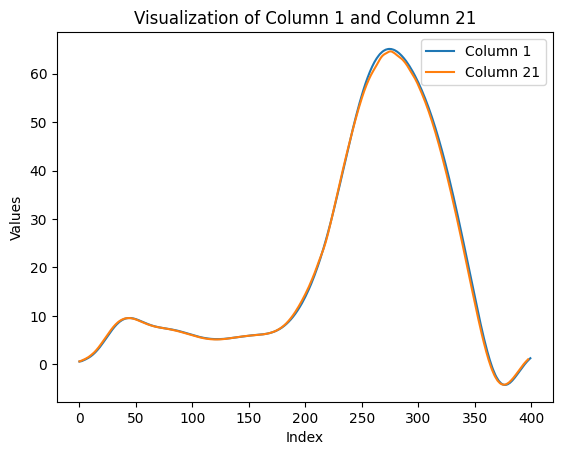

In [9]:
plt.plot(column_1, label='Column 1')
plt.plot(column_21, label='Column 21')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Visualization of Column 1 and Column 21')
plt.show()

